# Get and read in data

data source:  https://cneos.jpl.nasa.gov/ca/ (data saved April 22, 2021)
1. set filters for all data
2. download as CSV
3. Import libraries
4. read in csv file and name dataframe
5. confirm shape 

In [1]:
# step 3: import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [2]:
# step 4: read in data from csv

close_approach = pd.read_csv('data/cneos_closeapproach_data.csv')
close_approach.head()

,Object,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Diameter,Unnamed: 8
0,509352 (2007 AG),1900-Jan-04 22:25 ± 00:02,3.75 | 0.00963,3.75 | 0.00962,8.69,8.65,20.1,250 m - 570 m,a0509352
1,(2014 SC324),1900-Jan-11 01:07 ± 00:18,15.55 | 0.03997,15.53 | 0.03991,10.65,10.65,24.3,37 m - 82 m,bK14SW4C
2,(2012 UK171),1900-Jan-12 23:07 ± 00:13,19.39 | 0.04982,19.26 | 0.04950,7.16,7.15,24.3,37 m - 82 m,bK12UH1K
3,4660 Nereus (1982 DB),1900-Jan-29 18:33 ± 00:14,8.09 | 0.02078,8.08 | 0.02076,5.55,5.52,18.3,0.33 km,a0004660
4,(2015 RW83),1900-Feb-04 03:50 ± 14:49,12.89 | 0.03312,12.68 | 0.03258,3.14,3.12,24.1,40 m - 90 m,bK15R83W


In [3]:
#step 5: confrim shape (row, columns)
close_approach.shape

(28352, 9)

# Clean & organize data

Goal is to remove extra columns and convert columns with multiple data types into consistant columns that can be used in analysis.

1. drop unnessary column 
2. remove time & +- from date column (decreases accuracy but fine for my purposes)
3. seperate the distance columns so there are is one set in LD, one in au
4. confirm that the new columns were created
5. remove the old distance columns and those in au, just keep LD for distance(LD is the distance from earth to the moon, I picked this as it may be easier to relate to)
6. add a boolean column  to capture whether the diameter is measured in meters or kilometers
7. remove letters from Diameter column
8. split diameter into low and high columns
9. confirm the new columns are added
10. convert and None values in diameter high into 0.  (Several entries only had one value and these are captured in diameter low)
11.  drop all rows remaining with null values (22 out of 28k - not ideal but small enough that I feel comfortable with it)
12.  remove extra characters from diameter low and diameter high columns 
13.  trim diamter high and diameter low columns (Some loss of accuracy, I am sure there is a better way to address the extra decimal points but this worked to get the column data to be the same.)
14. case column data for Nonimal Distance LD, diameter low and diameter high as floats to be able to capture mean and for ease of exploration later.
15. add a column to calculate the mean of the diameter, if diameter high is 0, use diameter low
16. reate a new column, use column from step 6 to determine if the distance is in kilometers, if so multiply by 1000 so all values are meters
17. drop unnecessary columns
18. split date column into year, month and day for easy grouping
19. confirm column names and format

In [4]:
# step 1: remove unnamed 8 column
close_approach.drop('Unnamed: 8', axis=1, inplace=True)

In [5]:
#step 2: clean date column
close_approach['Close-Approach (CA) Date'] = close_approach['Close-Approach (CA) Date'].str[:11]
close_approach.head()

,Object,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Diameter
0,509352 (2007 AG),1900-Jan-04,3.75 | 0.00963,3.75 | 0.00962,8.69,8.65,20.1,250 m - 570 m
1,(2014 SC324),1900-Jan-11,15.55 | 0.03997,15.53 | 0.03991,10.65,10.65,24.3,37 m - 82 m
2,(2012 UK171),1900-Jan-12,19.39 | 0.04982,19.26 | 0.04950,7.16,7.15,24.3,37 m - 82 m
3,4660 Nereus (1982 DB),1900-Jan-29,8.09 | 0.02078,8.08 | 0.02076,5.55,5.52,18.3,0.33 km
4,(2015 RW83),1900-Feb-04,12.89 | 0.03312,12.68 | 0.03258,3.14,3.12,24.1,40 m - 90 m


In [6]:
# step 3: seperate distance colums
close_approach[['Nominal Distance LD', 'Nominal Distance au']]=close_approach['CA Distance Nominal (LD | au)'].str.split('|', expand = True)
close_approach[['Minimum Distance LD', 'Minimum Distance au']]=close_approach['CA Distance Minimum (LD | au)'].str.split('|', expand = True)

In [7]:
#step 4: confirm new coulmns added
close_approach.head()

,Object,Close-Approach (CA) Date,CA Distance Nominal (LD | au),CA Distance Minimum (LD | au),V relative (km/s),V infinity (km/s),H (mag),Diameter,Nominal Distance LD,Nominal Distance au,Minimum Distance LD,Minimum Distance au
0,509352 (2007 AG),1900-Jan-04,3.75 | 0.00963,3.75 | 0.00962,8.69,8.65,20.1,250 m - 570 m,3.75,0.00963,3.75,0.00962
1,(2014 SC324),1900-Jan-11,15.55 | 0.03997,15.53 | 0.03991,10.65,10.65,24.3,37 m - 82 m,15.55,0.03997,15.53,0.03991
2,(2012 UK171),1900-Jan-12,19.39 | 0.04982,19.26 | 0.04950,7.16,7.15,24.3,37 m - 82 m,19.39,0.04982,19.26,0.04950
3,4660 Nereus (1982 DB),1900-Jan-29,8.09 | 0.02078,8.08 | 0.02076,5.55,5.52,18.3,0.33 km,8.09,0.02078,8.08,0.02076
4,(2015 RW83),1900-Feb-04,12.89 | 0.03312,12.68 | 0.03258,3.14,3.12,24.1,40 m - 90 m,12.89,0.03312,12.68,0.03258


In [8]:
# step 5: remove old distance columns and only keep the new LD distance columns
close_approach.drop(['CA Distance Nominal (LD | au)', 'CA Distance Minimum (LD | au)', 
                     'Nominal Distance au', 'Minimum Distance au'], axis = 1, inplace=True)


In [9]:
# step 6:  for use later, create a column of booleans based on whether the diamter is measure in kilometers or meters

close_approach['diameter meters'] = np.where(close_approach['Diameter'].str.contains('km'), False, True)

In [10]:
# step 7:  since we created the column in step 6, remove the letters from the diameter column to allow for mean calculation

close_approach['Diameter'] = close_approach.Diameter.str.replace(r"[a-zA-Z]",'')


In [11]:
#  step 8 split the diamter column into two new columns (low, high)seperate diameter column and take average
close_approach[['diameter low', 'diameter high']]=close_approach['Diameter'].str.split('-', expand = True)


In [12]:
# step 9:  confirm new columns are added

close_approach.head()

,Object,Close-Approach (CA) Date,V relative (km/s),V infinity (km/s),H (mag),Diameter,Nominal Distance LD,Minimum Distance LD,diameter meters,diameter low,diameter high
0,509352 (2007 AG),1900-Jan-04,8.69,8.65,20.1,250 - 570,3.75,3.75,True,250,570
1,(2014 SC324),1900-Jan-11,10.65,10.65,24.3,37 - 82,15.55,15.53,True,37,82
2,(2012 UK171),1900-Jan-12,7.16,7.15,24.3,37 - 82,19.39,19.26,True,37,82
3,4660 Nereus (1982 DB),1900-Jan-29,5.55,5.52,18.3,0.33,8.09,8.08,False,0.33,None
4,(2015 RW83),1900-Feb-04,3.14,3.12,24.1,40 - 90,12.89,12.68,True,40,90


In [13]:
#  step 10:  since there were some diameter values that did not have a high and low, several lines in the new columns are None - for caluculation, make these 0

close_approach['diameter high'] = close_approach['diameter high'].fillna(0)


In [14]:
# step 11:  some lines have null values that will prevent calculations - get rid of nulls (22 out of 28k)

close_approach.dropna(axis = 0, inplace=True, how = 'any')
close_approach.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28330 entries, 0 to 28351
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Object                    28330 non-null  object 
 1   Close-Approach (CA) Date  28330 non-null  object 
 2   V relative (km/s)         28330 non-null  float64
 3   V infinity (km/s)         28330 non-null  float64
 4   H (mag)                   28330 non-null  float64
 5   Diameter                  28330 non-null  object 
 6   Nominal Distance LD       28330 non-null  object 
 7   Minimum Distance LD       28330 non-null  object 
 8   diameter meters           28330 non-null  bool   
 9   diameter low              28330 non-null  object 
 10  diameter high             28330 non-null  object 
dtypes: bool(1), float64(3), object(7)
memory usage: 2.4+ MB


In [15]:
# step 12:  remove extra special characters from diameter columns, they are preventing calculations

close_approach['diameter low'] = close_approach['diameter low'].str.replace(r"[^\d.]",'')
close_approach['diameter high'] = close_approach['diameter high'].str.replace(r"[^\d.]",'')
close_approach.head()

,Object,Close-Approach (CA) Date,V relative (km/s),V infinity (km/s),H (mag),Diameter,Nominal Distance LD,Minimum Distance LD,diameter meters,diameter low,diameter high
0,509352 (2007 AG),1900-Jan-04,8.69,8.65,20.1,250 - 570,3.75,3.75,True,250,570
1,(2014 SC324),1900-Jan-11,10.65,10.65,24.3,37 - 82,15.55,15.53,True,37,82
2,(2012 UK171),1900-Jan-12,7.16,7.15,24.3,37 - 82,19.39,19.26,True,37,82
3,4660 Nereus (1982 DB),1900-Jan-29,5.55,5.52,18.3,0.33,8.09,8.08,False,0.33,NaN
4,(2015 RW83),1900-Feb-04,3.14,3.12,24.1,40 - 90,12.89,12.68,True,40,90


In [16]:
# step 13:  there are a few remaining lines with odd formatting, triming these values down to tenths removes this.  Loses some accuracy but ok for these purposes.

close_approach['diameter low'] = close_approach['diameter low'].str[:3]
close_approach['diameter high'] = close_approach['diameter high'].str[:3]
close_approach.head()

,Object,Close-Approach (CA) Date,V relative (km/s),V infinity (km/s),H (mag),Diameter,Nominal Distance LD,Minimum Distance LD,diameter meters,diameter low,diameter high
0,509352 (2007 AG),1900-Jan-04,8.69,8.65,20.1,250 - 570,3.75,3.75,True,250,570
1,(2014 SC324),1900-Jan-11,10.65,10.65,24.3,37 - 82,15.55,15.53,True,37,82
2,(2012 UK171),1900-Jan-12,7.16,7.15,24.3,37 - 82,19.39,19.26,True,37,82
3,4660 Nereus (1982 DB),1900-Jan-29,5.55,5.52,18.3,0.33,8.09,8.08,False,0.3,NaN
4,(2015 RW83),1900-Feb-04,3.14,3.12,24.1,40 - 90,12.89,12.68,True,40,90


In [17]:
# step 14:  cast diameter columns as floats, also cast Nominal Distance as float - not necessary for calculation but allows for easier analysis later on

close_approach["diameter low"] = close_approach["diameter low"].astype(float)
close_approach["diameter high"] = close_approach["diameter high"].astype(float)
close_approach["Nominal Distance LD"] = close_approach["Nominal Distance LD"].astype(float)
close_approach.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28330 entries, 0 to 28351
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Object                    28330 non-null  object 
 1   Close-Approach (CA) Date  28330 non-null  object 
 2   V relative (km/s)         28330 non-null  float64
 3   V infinity (km/s)         28330 non-null  float64
 4   H (mag)                   28330 non-null  float64
 5   Diameter                  28330 non-null  object 
 6   Nominal Distance LD       28330 non-null  float64
 7   Minimum Distance LD       28330 non-null  object 
 8   diameter meters           28330 non-null  bool   
 9   diameter low              28330 non-null  float64
 10  diameter high             26884 non-null  float64
dtypes: bool(1), float64(6), object(4)
memory usage: 2.4+ MB


In [18]:
#step 15:  calculathe the mean of diameter high and low.  If there is a 0 in diameter high, use the diameter low value

close_approach['diameter mean'] = np.where(close_approach['diameter high'] != 0, close_approach[['diameter low', 'diameter high']].mean(axis=1), close_approach['diameter low'])

In [19]:
# step 16:  create a new column that contains the mean diamter all in meters (if column 6 is false multiply by 1000)

close_approach['diameter mean meters'] = np.where(close_approach['diameter meters'] == True, close_approach['diameter mean'], close_approach['diameter mean']*1000)

In [20]:
#step 17:  drop any columns no longer needed

close_approach.drop(['diameter meters', 'diameter low', 'diameter high', 'diameter mean', 'Diameter'], axis=1, inplace = True)

In [21]:
# step 18:  split out the date column into year, month and day for ease of grouping

close_approach[['year', 'month', 'day']] = close_approach["Close-Approach (CA) Date"].str.split('-', expand = True)
close_approach.head()

,Object,Close-Approach (CA) Date,V relative (km/s),V infinity (km/s),H (mag),Nominal Distance LD,Minimum Distance LD,diameter mean meters,year,month,day
0,509352 (2007 AG),1900-Jan-04,8.69,8.65,20.1,3.75,3.75,410.0,1900,Jan,04
1,(2014 SC324),1900-Jan-11,10.65,10.65,24.3,15.55,15.53,59.5,1900,Jan,11
2,(2012 UK171),1900-Jan-12,7.16,7.15,24.3,19.39,19.26,59.5,1900,Jan,12
3,4660 Nereus (1982 DB),1900-Jan-29,5.55,5.52,18.3,8.09,8.08,300.0,1900,Jan,29
4,(2015 RW83),1900-Feb-04,3.14,3.12,24.1,12.89,12.68,65.0,1900,Feb,04


In [22]:
# step 19:  confirm columns and data form

close_approach.head()

,Object,Close-Approach (CA) Date,V relative (km/s),V infinity (km/s),H (mag),Nominal Distance LD,Minimum Distance LD,diameter mean meters,year,month,day
0,509352 (2007 AG),1900-Jan-04,8.69,8.65,20.1,3.75,3.75,410.0,1900,Jan,04
1,(2014 SC324),1900-Jan-11,10.65,10.65,24.3,15.55,15.53,59.5,1900,Jan,11
2,(2012 UK171),1900-Jan-12,7.16,7.15,24.3,19.39,19.26,59.5,1900,Jan,12
3,4660 Nereus (1982 DB),1900-Jan-29,5.55,5.52,18.3,8.09,8.08,300.0,1900,Jan,29
4,(2015 RW83),1900-Feb-04,3.14,3.12,24.1,12.89,12.68,65.0,1900,Feb,04


# Explore and Analyze the Data

Explore the data through various methods, use charts to visulize.  I picked a few things to look into that I though would be interesting.  

1.  use .describe() to get a summary of the data (this is why I casted Distance as float above)
2.  use groupby and sort_values to find the top ten years with the least close approaches
3.  use groupby and sort_values to find the top ten years with the most close approaches
4.  calculate the average per year
5.  calculate the count of close approaches by year
6.  create a graph that displays the count of close approaches by year
7.  calucluate the average number of lcose approaches per month
8.  create a graph of the average close approaches per month
9.  sort out the top ten close approaches (by distance) for the year 2020
10.  create a graph of the top ten close approaches, vary the size of the marked based on the diameter
11.  sort out the top ten close approaches (by distance) for the year 2021
12.  create a graph of the top ten close approaches, vary the size of the marked based on the diameter
13.  sort out the top ten close approaches (by distance) for the year 2022
14.  create a graph of the top ten close approaches, vary the size of the marked based on the diameter
15.  sort out the top ten close approaches (by distance) for all future years
16.  create a graph of the top ten close approaches, vary the size of the marked based on the diameter
17.  create an api request to pull additional information regarding the outlier
18.  make initial request to url
19.  confirm request status code
20.  confirm text of the request
21.  look up the keys from the json dictionary
22.  create a list from the fields key and values
23.  create a list from the data key  and values
24.  the data list is nested, get rid of the nesting
25.  zip the created lists of fields and data into a dictionary
26.  create a dataframe from the dictionary, remove exccess columns and display the data


In [23]:
#step 1: summarize the data with .describe()

close_approach.describe()

,V relative (km/s),V infinity (km/s),H (mag),Nominal Distance LD,diameter mean meters
count,28330.000000,28330.000000,28330.000000,28330.000000,28330.000000
mean,10.498532,10.471188,24.573685,10.988586,5733.311015
std,5.482079,5.492262,2.735782,5.350387,41541.037416
min,0.510000,0.310000,14.100000,0.020000,0.000000
25%,6.580000,6.550000,22.900000,6.690000,20.500000
50%,9.405000,9.380000,25.100000,11.470000,41.000000
75%,13.330000,13.310000,26.500000,15.590000,108.500000
max,44.280000,44.270000,33.200000,19.460000,491100.000000


In [24]:
# step 2:  ten least dangerous years

close_approach.groupby('year')['Object'].count().sort_values().head(10)

year
2170    23
2200    27
2193    29
2188    30
2181    31
2198    32
2197    32
2160    32
2171    33
2157    34
Name: Object, dtype: int64

In [25]:
# step 3:  ten most dangerous years

close_approach.groupby('year')['Object'].count().sort_values(ascending = False).head(10)

year
2020    1427
2019    1151
2018     902
2017     886
2016     761
2021     612
2015     577
2014     549
2012     401
2013     389
Name: Object, dtype: int64

In [26]:
#step 4: average per year

close_approach.groupby('year')['Object'].count().mean()

94.11960132890366

In [27]:
# step 5: caluclate count per year
per_year = close_approach.groupby('year')['Object'].count()
per_year_df = per_year.to_frame()

<Figure size 720x288 with 0 Axes>

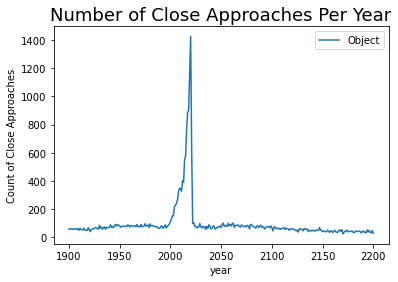

In [28]:
#step 6: create a graph of the counts per year
plt.figure(figsize = (10,4))
per_year_df.plot()
plt.xlabel('year')
plt.ylabel('Count of Close Approaches')
plt.title('Number of Close Approaches Per Year', size = 18);

In [29]:
# step 7: calculate the mean per month
by_Month = close_approach.groupby(['month','year'])['Object'].count()
by_Month_df = by_Month.to_frame()
by_Month_df
months_mean = by_Month_df.groupby('month')['Object'].mean()
months_mean2 = months_mean[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

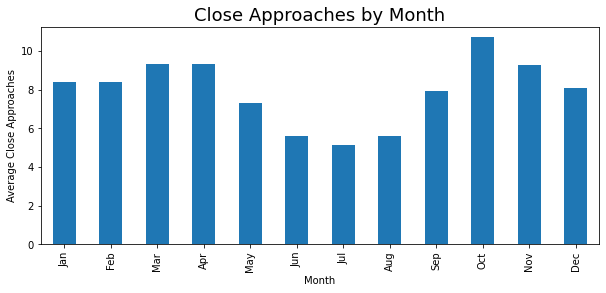

In [30]:
#step 8:  create a graph of the average close approaches per month
plt.figure(figsize = (10,4))
months_mean2.plot(kind ='bar')
plt.xlabel('Month')
plt.ylabel('Average Close Approaches')
plt.title('Close Approaches by Month', size = 18);


In [31]:
# step 9: top ten closest last year
twenty = close_approach[close_approach['year'] == '2020'].sort_values('Nominal Distance LD').head(10)

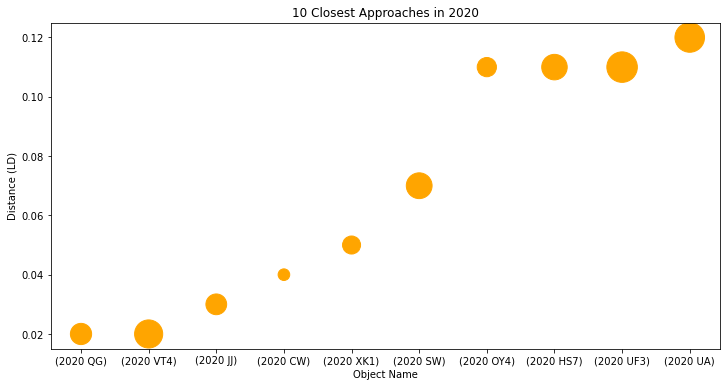

In [32]:
# step 10: graph the top ten closest approachs in 2020
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(x=twenty['Object'], y=twenty['Nominal Distance LD'], color='orange', alpha=1, s = twenty['diameter mean meters']*100)
plt.xlabel("Object Name")
plt.ylabel("Distance (LD)")
plt.title("10 Closest Approaches in 2020");

In [33]:
#step 11: top ten closest this year
twenty_one = close_approach[close_approach['year'] == '2021'].sort_values('Nominal Distance LD').head(10)

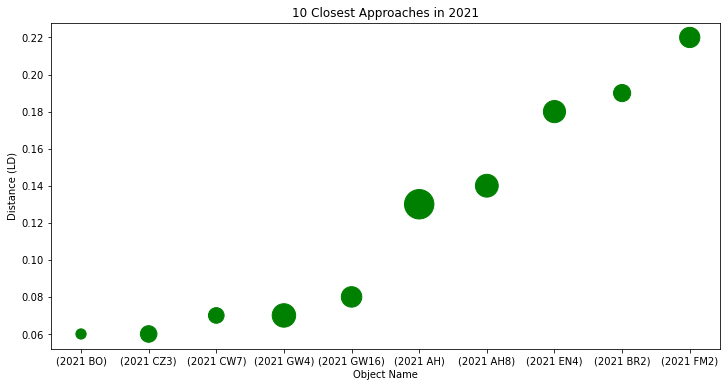

In [49]:
#step 12: graph the top ten closests in 2021
fig, ax = plt.subplots(figsize = (12,6))

ax.scatter(x=twenty_one['Object'], y=twenty_one['Nominal Distance LD'], color='green', alpha=1, s = twenty_one['diameter mean meters']*100)
plt.xlabel("Object Name")
plt.ylabel("Distance (LD)")
plt.title("10 Closest Approaches in 2021");

In [35]:
# step 13: top ten closest next year
twenty_two = close_approach[close_approach['year'] == '2022'].sort_values('Nominal Distance LD').head(10)



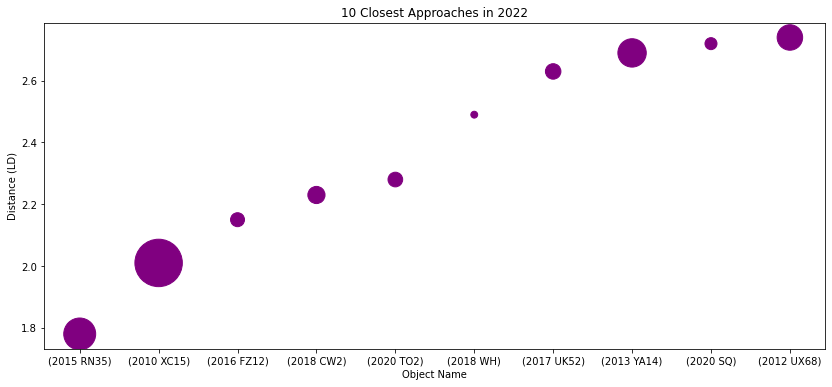

In [36]:
#step 14: graph the top ten closests in 2022
fig, ax = plt.subplots(figsize = (14,6))

ax.scatter(x=twenty_two['Object'], y=twenty_two['Nominal Distance LD'], color='purple', alpha=1, s = twenty_two['diameter mean meters']*10)
plt.xlabel("Object Name")
plt.ylabel("Distance (LD)")
plt.title("10 Closest Approaches in 2022");

In [37]:
#step 15: top ten closest in the future
top_ten = close_approach[close_approach['year'] >= '2021'].sort_values('Nominal Distance LD').head(10)

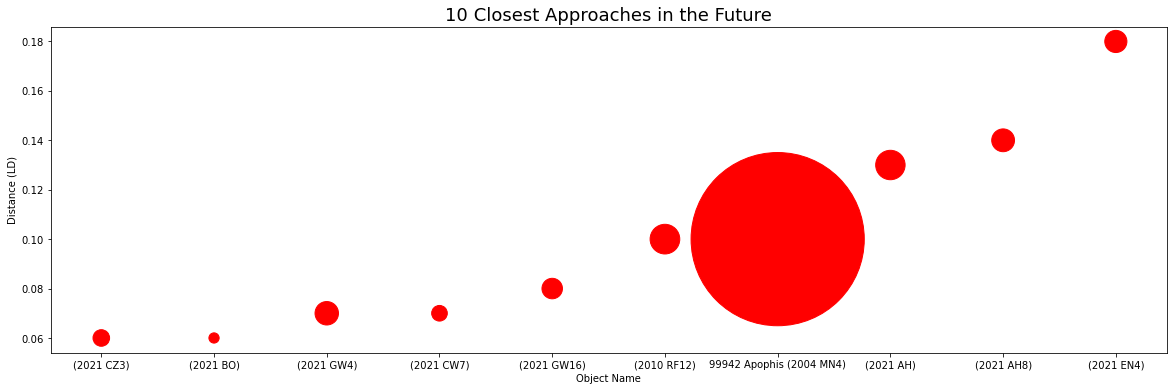

In [38]:
#step 16:  graph the top ten biggest
fig, ax = plt.subplots(figsize = (20,6))

ax.scatter(x=top_ten['Object'], y=top_ten['Nominal Distance LD'], color='red', alpha=1, s = top_ten['diameter mean meters']*100)
plt.xlabel("Object Name")
plt.ylabel("Distance (LD)")
plt.title("10 Closest Approaches in the Future", size =18);

In [39]:
#step 17: api for data about the interesting one above

more_data_url = 'https://ssd-api.jpl.nasa.gov/cad.api?des=99942&dist-max=.02&date-max=2100-01-01&diameter=True&fullname=True'

In [40]:
#step 18 make initial request
req = requests.get(more_data_url)

In [41]:
#step 19: confirm connection
req.status_code

200

In [42]:
#step 20:  confirm text
req.text

'{"signature":{"source":"NASA/JPL SBDB Close Approach Data API","version":"1.3"},"count":"1","fields":["des","orbit_id","jd","cd","dist","dist_min","dist_max","v_rel","v_inf","t_sigma_f","h","diameter","diameter_sigma","fullname"],"data":[["99942","214","2462240.407091922","2029-Apr-13 21:46","0.000254092564063349","0.000254075059480256","0.000254110068760328","7.42252962468042","5.84135572249032","< 00:01","19.7","0.34","0.04"," 99942 Apophis (2004 MN4)"]]}\n'

In [43]:
#step 21:  look up keys

data = req.json()
data.keys()

dict_keys(['signature', 'count', 'fields', 'data'])

In [44]:
#step 22:  create list from fields key and values

fields = data['fields']


In [45]:
#step 23:  create list from data key and values

data_1 = data['data']
data_1

[['99942',
  '214',
  '2462240.407091922',
  '2029-Apr-13 21:46',
  '0.000254092564063349',
  '0.000254075059480256',
  '0.000254110068760328',
  '7.42252962468042',
  '5.84135572249032',
  '< 00:01',
  '19.7',
  '0.34',
  '0.04',
  ' 99942 Apophis (2004 MN4)']]

In [46]:
#step 24: un-nest the data list

data_2 = data_1[0]
data_2

['99942',
 '214',
 '2462240.407091922',
 '2029-Apr-13 21:46',
 '0.000254092564063349',
 '0.000254075059480256',
 '0.000254110068760328',
 '7.42252962468042',
 '5.84135572249032',
 '< 00:01',
 '19.7',
 '0.34',
 '0.04',
 ' 99942 Apophis (2004 MN4)']

In [47]:
#step 25: zip the field and data lists together as dictionary

data_di = dict(zip(fields, data_2))
data_di

{'des': '99942',
 'orbit_id': '214',
 'jd': '2462240.407091922',
 'cd': '2029-Apr-13 21:46',
 'dist': '0.000254092564063349',
 'dist_min': '0.000254075059480256',
 'dist_max': '0.000254110068760328',
 'v_rel': '7.42252962468042',
 'v_inf': '5.84135572249032',
 't_sigma_f': '< 00:01',
 'h': '19.7',
 'diameter': '0.34',
 'diameter_sigma': '0.04',
 'fullname': ' 99942 Apophis (2004 MN4)'}

In [48]:
#step 26:  create dataframe from dictionary, drop excess columns and display

data_df = pd.DataFrame.from_dict([data_di])
data_df
data_df.drop(['orbit_id', 'jd', 'dist_min', 'dist_max', 'v_rel', 'v_inf', 't_sigma_f', 'diameter_sigma'], axis=1, inplace= True)
data_df

,des,cd,dist,h,diameter,fullname
0,99942,2029-Apr-13 21:46,0.000254092564063349,19.7,0.34,99942 Apophis (2004 MN4)
